## Lab 8:  Clustering
Environmental justice (EJ) seeks to ensure that all communities, regardless of socioeconomic status or demographic background, have equal access to clean air, water, and, in the form of energy justice, access to renewable energy resources while minimizing exposure to environmental hazards. In this lab, we will apply clustering analysis to explore how U.S. counties group together based on renewable energy potential, demographic characteristics, and environmental risk factors.

The EEIP dataset was collated by the National Renewable Energy Lab (NREL) and contains a large set of features from multiple other databases including SLOPE (renewable energy potential) and EJSCREEN (environmental risk indicators).

Link to metadata: https://ucsb.box.com/s/x3olvh3rd8w5h7xz8jnm3v8g3t4ajjsg

First you will step through a guided clustering exploration of renewable energy production potential.  Then you will formulate a question of your own that brings in an environmental justice component.


### Step 0: Load Libraries and Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the EEIP dataset 
eeip_data = pd.read_csv("data/eeip.data.csv")

## Part I:
In this part, we will step through an analysis that examines how US counties cluster in their potential production of renewable energy.  

### Step 1: Exploratory Data Analysis

First we need to check for missing data and remove incomplete rows. Since clustering is a distance-based technique, we also need to ensure that the features used for clustering are scaled appropriately to prevent dominant features from skewing results.  For our first analysis, use the following variables from the SLOPE dataset related to energy production potential as your features: 
- `utility_pv_technical_generation_potential_mwh`
- `residential_pv_technical_generation_potential_mwh`
- `land_based_wind_technical_generation_potential_mwh`
- `commercial_pv_technical_generation_potential_mwh`

*Information on these variables is available on line 7 of the ColumnsExplained tab of the metadata*

Once you have removed incomplete rows and scaled, print the shape of your processed dataframe. 

In [28]:
# View how many rows have missing data in columns above
eeip_data[['utility_pv_technical_generation_potential_mwh', 'residential_pv_technical_generation_potential_mwh', 
           'land_based_wind_technical_generation_potential_mwh', 'commercial_pv_technical_generation_potential_mwh']].isnull().sum()

utility_pv_technical_generation_potential_mwh         0
residential_pv_technical_generation_potential_mwh     1
land_based_wind_technical_generation_potential_mwh    0
commercial_pv_technical_generation_potential_mwh      1
dtype: int64

In [29]:
# Assign these features to our X variable
X = eeip_data[['utility_pv_technical_generation_potential_mwh', 'residential_pv_technical_generation_potential_mwh', 
           'land_based_wind_technical_generation_potential_mwh', 'commercial_pv_technical_generation_potential_mwh']].dropna()

# Check if NAs are removed
X.isnull().sum()

utility_pv_technical_generation_potential_mwh         0
residential_pv_technical_generation_potential_mwh     0
land_based_wind_technical_generation_potential_mwh    0
commercial_pv_technical_generation_potential_mwh      0
dtype: int64

In [30]:
# Scale the feature data to perform clustering
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

# Create df from scaled data for later use
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# View df
X_scaled

,utility_pv_technical_generation_potential_mwh,residential_pv_technical_generation_potential_mwh,land_based_wind_technical_generation_potential_mwh,commercial_pv_technical_generation_potential_mwh
0,-0.331171,-0.121811,-0.369593,-0.214820
1,0.638649,0.549126,-0.370021,0.081081
2,-0.004453,-0.270669,-0.266443,-0.199095
3,-0.510007,-0.279806,-0.395868,-0.223600
4,-0.473902,-0.123166,-0.251646,0.007931
...,...,...,...,...
3102,10.375964,-0.177612,13.089249,-0.227029
3103,-0.659747,-0.287248,-0.638372,-0.280660
3104,0.673568,-0.275910,1.436273,-0.259960
3105,0.278162,-0.311214,0.760799,-0.283715


### Step 2: Hierarchical Clustering Analysis

Now that we have preprocessed our dataset and standardized the energy potential features, we will use hierarchical clustering to explore how counties group together based on their energy potential.

A dendrogram is a tree-like visualization that shows how clusters are merged step by step. By analyzing the dendrogram, we can decide the optimal number of clusters by looking at the distance between merges.

Use `linkage()` to perform the clustering.  Use 'ward' for the `method` parameter, a method which minimizes the variance within clusters, producing well-balanced groups. We will first visualize the **full dendrogram** using `dendrogram` before deciding on a truncation strategy.


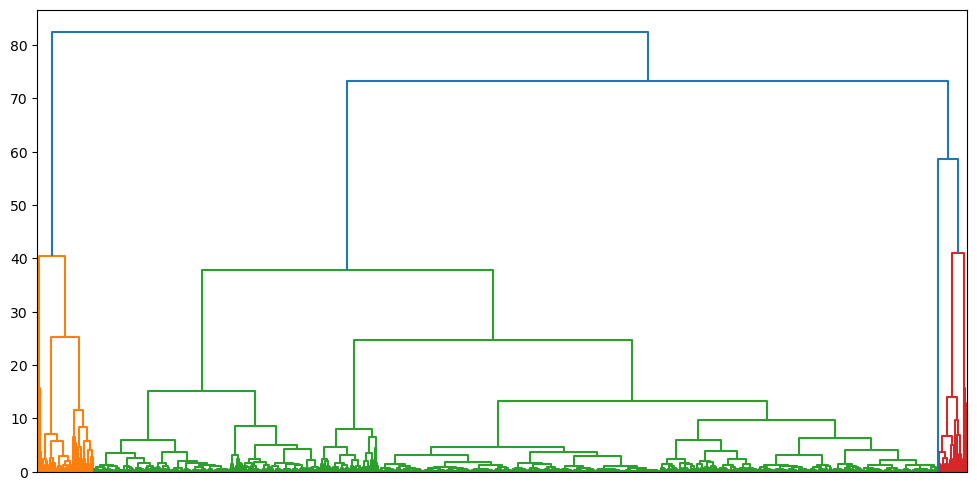

In [31]:
# Perform hierarchical clustering
clustering = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(clustering, no_labels=True)
plt.show()

### Step 3: Set Up Cluster Interpretation

After determining the optimal number of clusters from the dendrogram, we now assign each county to a cluster using the extracted cluster labels.

To better understand the clustering results, we will:
- Define `num_clusters` as the ideal number of clusters based on the dendrogram created above
- Extract cluster assignment attribute from the hierarchical clustering using `fcluster()` with `criterion = "maxclust"`
- Create a new variable `Cluster` in your cleaned dataframe and assign cluster labels to it
- Compute and print the mean values of the original energy potential features for each cluster.

This summary will help us interpret how counties differ in energy potential across clusters and inform possible next steps for analysis.


In [32]:
# From dendogram above
num_clusters = 4

# Extract cluster assignments
clusters = fcluster(clustering, num_clusters, criterion= 'maxclust')

# Create new Cluster column in the dataset
X_scaled['Cluster'] = clusters

# Compute the mean of each cluster
cluster_means = X_scaled.groupby('Cluster').mean()
cluster_means

,utility_pv_technical_generation_potential_mwh,residential_pv_technical_generation_potential_mwh,land_based_wind_technical_generation_potential_mwh,commercial_pv_technical_generation_potential_mwh
Cluster,,,,
1,2.831068,-0.193351,3.004580,-0.197860
2,-0.184742,-0.121549,-0.185776,-0.104943
3,-0.076363,3.631745,-0.382148,3.046819
4,-0.661236,26.888227,-0.527199,37.606587


### Step 4: Visualizing Energy Potential Across Clusters
Now that we have assigned cluster labels, we want to understand how energy potential differs across clusters. To do this, we will visualize these differences using a grouped bar chart.

Each bar should represent the mean value of an energy potential indicator for a specific cluster. These different patterns of potential is what caused the model to segregate the clusters in the way that it did.

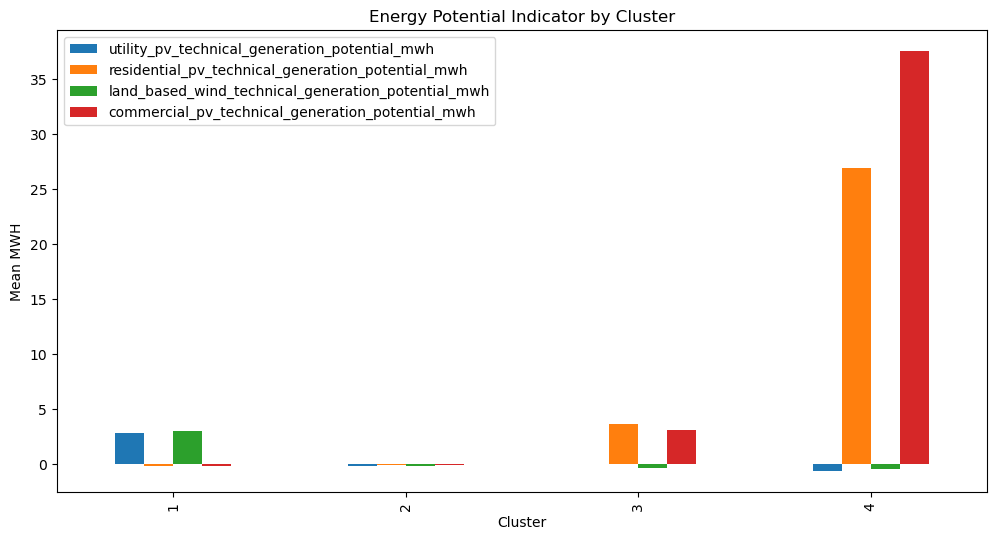

In [33]:
# Create grouped bar chart
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Energy Potential Indicator by Cluster')
plt.ylabel('Mean MWH')
plt.xlabel('Cluster')
plt.show()

### Step 5: Interpret Clustering Results
Interpret your plot of the resulting clusters.  How would you characterize and compare the four different clusters in terms of their profile of energy generation?

Cluster 4 has the highest Mean MWH by a huge margin out of all the clusters. Specifically, residential and commerical solar power have the potential to produce about 27 and 38 MWH respectively. The other three clusters are minimal when compared to the fourth. Cluster 1 has about 2.5 MWH for ulility (solar farm) and land based wind potential energy generation, cluster 2 has basically 0 for all four features, and cluster 3 has about 3 MWH for residential and commericial solar energy generation. 

## Part II: Environmental Justice Metrics
Now it's your turn.

So far, we have clustered counties based on **energy potential**, but energy potential alone does not tell the full story of **energy equity and access**. To deepen the analysis, we need to consider environmental justice (EJ) factors that affect communities’ ability to benefit from renewable energy and the environmental burdens they already experience.

1. Explore EJSCREEN variables:  
   - The EJSCREEN subset of our dataset contains metrics on pollution burden, demographics (population size), and health risks (*lines 31-41 of the ColumnsExplained tab in the metadata sheet linked above*).
   - Identify 1-3 variables that could be important for energy equity analysis.  You could introduce them either as clustering features, as post-clustering variables to help interpret the clusters, or both. 

2. Modify the clustering approach:  
   - Add your selected EJSCREEN variables to our feature set.    
   - Re-run the hierarchical clustering analysis with the expanded dataset (if you added any as clustering features).  

3. Interpret the Results:
   Your interpretation could include considerations such as:
   - How do clusters change when EJSCREEN variables are included?  
   - Are counties with high renewable energy potential also burdened by environmental risks?  
   - What policy recommendations might emerge from these findings?  

### 1. Explore EJSCREEN variables

In [34]:
#Your Part 2 Code

# Explore Variables in eeip dataset
for col in eeip_data.columns:
    print(col)

county_fips
county
state
county_pop
utilitypv_techpot_quint
utility_pv_technical_generation_potential_mwh
residentialpv_techpot_quint
residential_pv_technical_generation_potential_mwh
landbasedwind_techpot_quint
land_based_wind_technical_generation_potential_mwh
commercialpv_techpot_quint
commercial_pv_technical_generation_potential_mwh
commercialpv_lcoe_cap_quint
commercial_pv_lcoe_capital_price_per_mw_median
commercialpv_lcoe_quint
commercial_pv_lcoe_price_per_mwh_median
geothermal_lcoe_cap_quint
geothermal_lcoe_capital_price_per_mw_median
geothermal_lcoe_quint
geothermal_lcoe_price_per_mwh_median
hydro_lcoe_cap_quint
hydro_lcoe_capital_price_per_mw_median
hydro_lcoe_quint
hydro_lcoe_price_per_mwh_median
landbasedwind_lcoe_cap_quint
land_based_wind_lcoe_capital_price_per_mw_median
landbasedwind_lcoe_quint
land_based_wind_lcoe_price_per_mwh_median
utilitypv_lcoe_cap_quint
pv_lcoe_capital_price_per_mw_median
utilitypv_lcoe_quint
pv_lcoe_price_per_mwh_median
residentialpv_lcoe_cap_quint

### 2. Modify clustering approach



In [35]:
# Add three new columns to the dataset
X = eeip_data[['utility_pv_technical_generation_potential_mwh', 'residential_pv_technical_generation_potential_mwh',
               'land_based_wind_technical_generation_potential_mwh', 'commercial_pv_technical_generation_potential_mwh',
               'lowincome_pop_1_prop', 'lowincome_pop_5_prop']]
X = X.dropna()

# Scale the feature data to perform clustering
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

# Create df from scaled data for later use
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# View df
X_scaled

,utility_pv_technical_generation_potential_mwh,residential_pv_technical_generation_potential_mwh,land_based_wind_technical_generation_potential_mwh,commercial_pv_technical_generation_potential_mwh,lowincome_pop_1_prop,lowincome_pop_5_prop
0,-0.331171,-0.121811,-0.369593,-0.214820,-0.453372,-0.384183
1,0.638649,0.549126,-0.370021,0.081081,0.317375,-0.428124
2,-0.004453,-0.270669,-0.266443,-0.199095,-0.703201,1.561303
3,-0.510007,-0.279806,-0.395868,-0.223600,-0.170233,0.763155
4,-0.473902,-0.123166,-0.251646,0.007931,-0.246371,-0.128491
...,...,...,...,...,...,...
3102,10.375964,-0.177612,13.089249,-0.227029,0.237330,-0.910609
3103,-0.659747,-0.287248,-0.638372,-0.280660,1.009909,-0.679213
3104,0.673568,-0.275910,1.436273,-0.259960,0.795770,0.304220
3105,0.278162,-0.311214,0.760799,-0.283715,0.296113,-1.072586


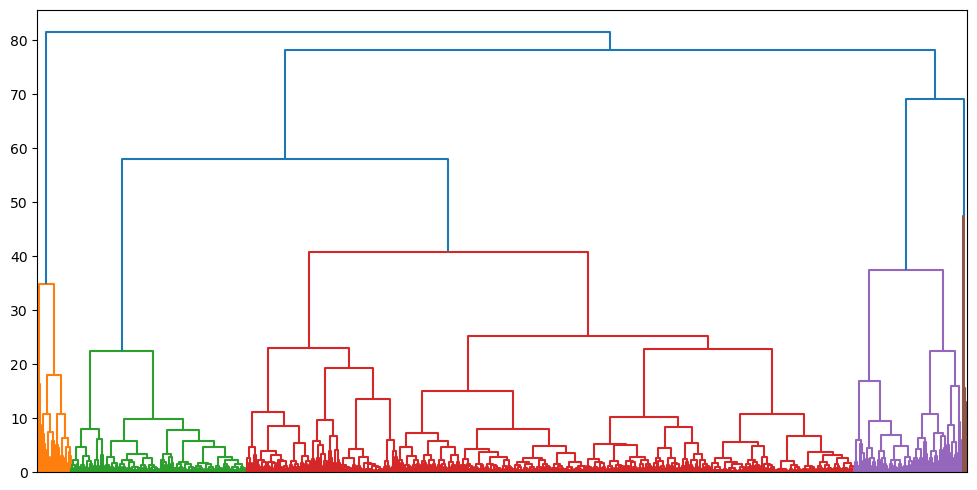

In [36]:
# Hierarchy clustering analysis
clustering = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(clustering, no_labels=True)
plt.show()

In [37]:
# From dendogram above
num_clusters = 6

# Extract cluster assignments
clusters = fcluster(clustering, num_clusters, criterion= 'maxclust')

# Create new Cluster column in the dataset
X_scaled['Cluster'] = clusters

# Compute the mean of each cluster
cluster_means = X_scaled.groupby('Cluster').mean()
cluster_means

,utility_pv_technical_generation_potential_mwh,residential_pv_technical_generation_potential_mwh,land_based_wind_technical_generation_potential_mwh,commercial_pv_technical_generation_potential_mwh,lowincome_pop_1_prop,lowincome_pop_5_prop
Cluster,,,,,,
1,3.765185,-0.141231,3.756390,-0.170159,-0.255741,0.522078
2,-0.297552,-0.233131,-0.389342,-0.189614,-0.553540,1.458415
3,-0.057824,-0.172192,-0.010546,-0.152984,-0.185265,-0.373238
4,-0.370008,0.958977,-0.458550,0.838268,1.958053,-0.438111
5,0.461644,9.625287,-0.221227,7.476193,1.076372,0.189911
6,-0.661236,26.888227,-0.527199,37.606587,0.791182,0.179718


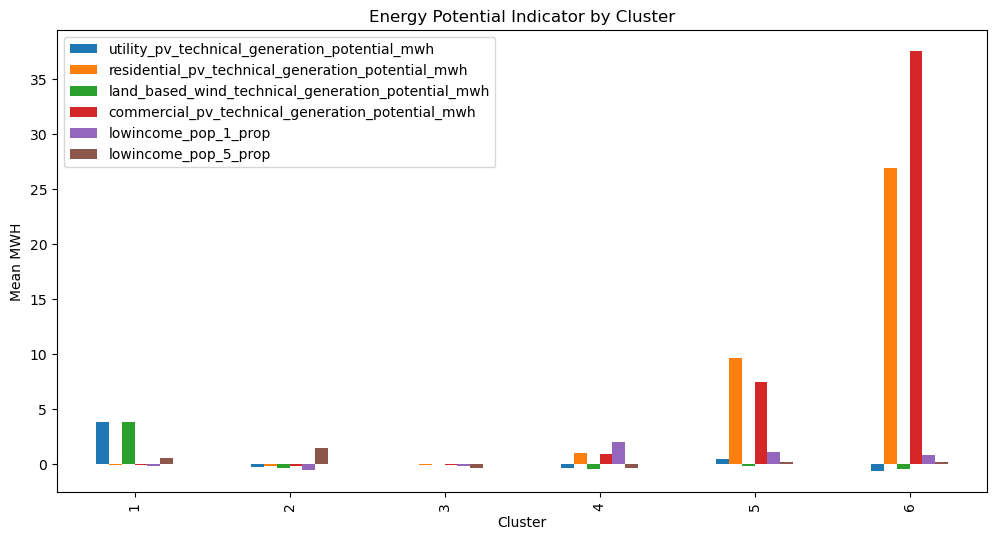

In [38]:
# Create grouped bar chart 
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Energy Potential Indicator by Cluster')
plt.ylabel('Mean MWH')
plt.xlabel('Cluster')
plt.show()

### 3. Interpret the results

Which EJSCREEN variable(s) did you add to the analysis? Why did you choose these?  What is the question you are interested in? What did you learn from the analysis

The variables I chose were `lowincome_pop_1_prop` and `lowincome_pop_5_prop`. These variables represent 20% of census block groups with the lowest percentage of low income population and 20% of census block groups with the highest percentage of low income population respectively. Meaning `pop_1` contains richer communities, while `pop_5` contains poorer communities. I chose these variables because I was interested at looking at the richest communities on average vs. the poorest communities on average. A question that comes up when looking at this analysis is: What are the similarities and differences of renewable energy production when comparing richer vs poorer communities? 

From our bar graph it looks like richer communities have higher potential for residential and commericial solar power energy generation. On the flip side, poorer communities are linked to areas of no renewable energy generation and areas of solar farms and wind energy generation. 

